# Modelos de Clasificación

------------------------------------------------------


### Data Science and Machine Learning

#### Febrero 2023

**Aurora Cobo Aguilera**

**The Valley**

------------------------------------------------------

<a id='multiclase'></a>
# 1. Clasificación multi-clase con clasificadores binarios
---

Hasta ahora hemos trabajado con problemas de clasificación binaria, en los que la etiqueta por dato únicamente toma dos valores ($Y=0$, $Y=1$). Una forma de abordar problemas de clasificación multiclase $Y\in\{0,1, \ldots, M-1\}$ es transformar el problema en múltiples clasificadores binarios.

Hay dos estrategias fundamentales: 1 contra 1 y uno contra todos.

### Clasificación multi-clase 1 contra 1

- Esta estrategia consiste en ajustar un clasificador por cada par de clases. 
- En el momento de la predicción cada observación de test se clasifica con todos los clasificadores binarios, y cada clasificador asigna esa observación a una de sus dos posibles clases: vota por una clase. La clase final a la que se asigna la observación de test es aquella que recibió más votos
- Hay que ajustar M * (M - 1) / 2 clasificadores binarios.
- Cada uno de ellos sólo involucra un conjunto pequeño de datos (los correspondientes a ambas clases).
- En caso de empate hay que decidir una estrategia.

### Clasificación uno contra todos

- Se ajusta un clasificador por clase (M en total), que clasifica entre dicha clase o cualquiera de las demás.
- Mayor interpretabilidad (cada clase sólo participa en un clasificador).
- En predicción, se selecciona la clase con mayor confianza. Por ejemplo, mayor probabilidad en el regresor logístico.
- Un empate es en general improbable (no comparamos votos sino confianza en la predicción).
 
 <img src='http://www.tsc.uc3m.es/~olmos/BBVA/multi_labelv2.jpeg' width=800/>


Para implementar estas estrategias, utilizaremos las funciones [OneVsOneClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html#sklearn.multiclass.OneVsOneClassifier) y [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier) de sklearn. Ambas clases se utilizan de forma muy parecida.

Vamos a utilizar de nuevo un data set en 2 dimensiones para visualizar las dos estrategias de clasificación multiclase.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [2]:
# Cargamos dataset

data_ejemplo3 = pd.read_csv('http://www.tsc.uc3m.es/~olmos/BBVA/ejemplo3.txt',header=None)

In [3]:
data = np.array(data_ejemplo3)

## Separamos X e Y
X03=data[:,0:2]
Y3=data[:,2]

# Separamos train de test
X03_train, X03_test, Y3_train, Y3_test = train_test_split(X03, Y3, test_size=0.2, random_state=0)

print("El conjunto de datos de entrenamiento consta {0:d} observaciones de {1:d} dimensiones\n".format(X03_train.shape[0], X03_train.shape[1]))

# Variables para la representación de la frontera de decisión (antes de normalizar!)
min1=np.min(X03_train[:,0])
max1=np.max(X03_train[:,0])
min2=np.min(X03_train[:,1])
max2=np.max(X03_train[:,1])

# Normalización

transformer3 = StandardScaler().fit(X03_train)

X3_train = transformer3.transform(X03_train)
X3_test = transformer3.transform(X03_test)

El conjunto de datos de entrenamiento consta 690 observaciones de 2 dimensiones



Vamos a dibujar el histograma de las clases en el conjunto de training

In [4]:
classes,unique_counts = np.unique(ar=Y3_train,return_counts=True)

In [5]:
def muestra_frontera(X_train,Y_train,x1_grid=None,x2_grid=None,probs_grid=None,dataset=False,frontera=False,thresholds=[0.5],
                     prob_levels=False, titulo='Datos',xlabel='$x_1$',ylabel='$x_2$'):
    
    """
    - dataset=True --> Representamos solo el dataset
    - frontera=True --> Representamos dataset con frontera de decisión (podemos especificar mas niveles con thresholds)
    - prob_levels=True --> Representamos dataset con curvas de nivel de probabilidad de clase 1.
    """
    
    # Identificamos clases
    clases = np.unique(Y_train).astype(np.int32)
    labels = ['Class ' + str(int(c)) for c in clases]
    
    if(dataset==True):
        
        # Dibujamos únicamente dataset
        plt.figure()
        for c in clases:
            plt.plot(X_train[Y_train==c,0],X_train[Y_train==c,1],'s',label=labels[c])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend(loc='upper right')
        plt.title(titulo)
        plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
        plt.show()
    
    if(frontera==True):
        
        # Dibujamos dataset + líneas de contorno definidas en `thresholds`
        fig,ax = plt.subplots()
        for c in clases:
            plt.plot(X_train[Y_train==c,0],X_train[Y_train==c,1],'s',label=labels[c])
        cs=ax.contour(x1_grid,x2_grid,np.reshape(probs_grid[:,1],np.shape(x1)),thresholds,linestyles='dashed')
        ax.clabel(cs, inline=1, fontsize=12)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend(loc='upper right')
        plt.title(titulo)
        plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
        plt.show()

    if(prob_levels==True):
        
        # Dibujamos dataset + mapa de probabilidades
        fig,ax = plt.subplots()
        for c in clases:
            plt.plot(X_train[Y_train==c,0],X_train[Y_train==c,1],'s',label=labels[c])
        cs = ax.contourf(x1_grid,x2_grid,np.reshape(probs_grid[:,1],np.shape(x1)),np.arange(0,1.1,0.0005),linestyles='dashed',cmap='Greys')
        cbar = fig.colorbar(cs)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend(loc='upper right')
        plt.title(titulo)
        plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
        plt.show()
    

<ipython-input-6-65f06ac5a0f0>:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


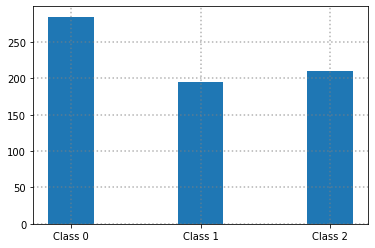

<ipython-input-5-5885b8d7e668>:24: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


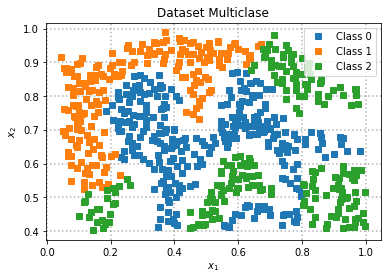

In [6]:
labels = [r'Class ' + str(int(c)) for c in classes]
width = 0.35  # Anchura de las barras

fig, ax = plt.subplots()
rect = ax.bar(classes, unique_counts, width=width)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.xticks(classes,labels)
plt.show()

# Representaciones usando la función muestra_frontera
muestra_frontera(X_train=X03_train,Y_train=Y3_train,dataset=True,titulo='Dataset Multiclase')

Claramente es un dataset complicado! Vamos a ilustrar la clasificación multiclase usando un modelo no-paramétrico,  k-NN.

### 1.1. Implementación 1 contra 1 con k-nn

Cada uno de los 3 clasificadores k-NN tendrá un valor de k en general distinto, que vamos a validar usando `GridSearchCV`.

In [7]:
from sklearn.multiclass import OneVsOneClassifier

# Parámetros
K_max = 20
rango_K = np.arange(1, K_max+1)
nfold = 10
# Define un diccionario con el nombre de los parámetros a explorar como clave y los rangos como valor 
diccionario_parametros = [{'n_neighbors': rango_K}]

# Validación cruzada con GridSearchCV
mi_knn3 = GridSearchCV(estimator=neighbors.KNeighborsClassifier(), param_grid=diccionario_parametros, cv=nfold)

mi_knn3_OneVsOne = OneVsOneClassifier(mi_knn3).fit(X3_train,Y3_train)

In [8]:
# Podemos ver la lista de clasificadores entrenados
print(mi_knn3_OneVsOne.estimators_)

(GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])}]), GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])}]), GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])}]))


In [9]:
# Y el número de vecinos validado para cada uno de ellos
for i,clasificador in enumerate(mi_knn3_OneVsOne.estimators_):
    print("El número de vecinos para el clasificador {0:d} es {1:d}".format(i,clasificador.best_params_['n_neighbors']))

El número de vecinos para el clasificador 0 es 10
El número de vecinos para el clasificador 1 es 1
El número de vecinos para el clasificador 2 es 11


Imprimamos la región de decisión para cada uno de los 3 clasificadores ...

<ipython-input-5-5885b8d7e668>:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


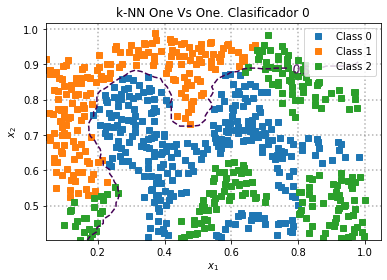

<ipython-input-5-5885b8d7e668>:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


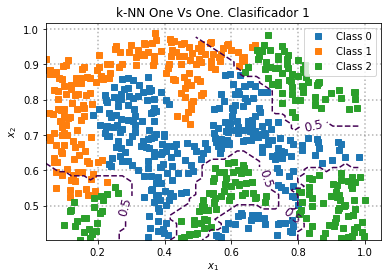

<ipython-input-5-5885b8d7e668>:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


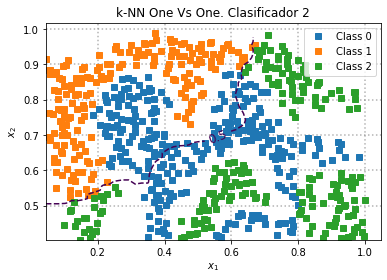

In [10]:
#Obtenemos una rejilla de puntos en los que evaluaremos nuestro RL (espacio original de los datos!)
x1,x2 = np.mgrid[min1:max1:(max1-min1)/50, min2:max2:(max2-min2)/50]
grid = np.transpose(np.row_stack([x1.ravel(), x2.ravel()]))

# Normalizamos la rejilla
grid_norm = transformer3.transform(grid)

for i,c in enumerate(mi_knn3_OneVsOne.estimators_):
    
    #Estimamos la probabilidad asociada a cada punto con el método .predic_proba
    probs_KNN3=c.predict_proba(grid_norm)
    
    label = r'k-NN One Vs One. Clasificador ' + str(i)

    # Representaciones usando la función muestra_frontera
    muestra_frontera(x1_grid=x1,x2_grid=x2,probs_grid=probs_KNN3,
                     X_train=X03_train,Y_train=Y3_train,frontera=True,
                     titulo=label)


A la vista de los diagramas, podemos comprobar que
- El primer clasificador separa la clase 0 de la 1
- El segundo clasificador separa la clase 0 de la 2
- El tercer clasificador separa la clase 1 de la 2

Finalmente, para comprobar cómo de bien funciona el k-NN multi-clase que hemos implementado, vamos a obtener la [**matriz de confusión**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):

In [11]:
from sklearn.metrics import confusion_matrix

conf_matrix3 = confusion_matrix(Y3_test,mi_knn3_OneVsOne.predict(X3_test))

print(conf_matrix3)

[[78  2  0]
 [ 0 46  2]
 [ 0  1 44]]


Como podemos comprobar la tasa de error de clasificador es muy baja! Solo hay 5 puntos fuera de la diagonal en la matriz de confusión.

Sklearn proporciona una clase ([plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)) que permite dibujar la matrix de confusión de forma más clara.

In [19]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mi_knn3_OneVsOne, X3_test, Y3_test)

ImportError: ignored



### 1.2. Implementación 1 contra todos con k-nn

Cada uno de los 3 clasificador k-NN tendrá un valor de k en general distinto, que vamos a validar usando `GridSearchCV`.

In [14]:
from sklearn.multiclass import OneVsRestClassifier

mi_knn3_OneVsRest = OneVsRestClassifier(mi_knn3).fit(X3_train,Y3_train)

In [15]:
# Y el número de vecinos validado para cada uno de ellos
for i,clasificador in enumerate(mi_knn3_OneVsRest.estimators_):
    print("El número de vecinos para el clasificador {0:d} es {1:d}".format(i,clasificador.best_params_['n_neighbors']))

El número de vecinos para el clasificador 0 es 1
El número de vecinos para el clasificador 1 es 10
El número de vecinos para el clasificador 2 es 1


Imprimamos la región de decisión para cada uno de los 3 clasificadores ...

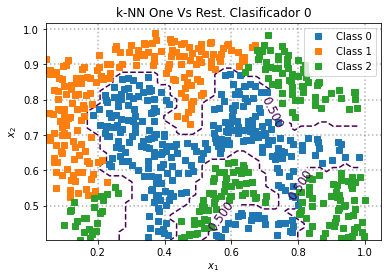

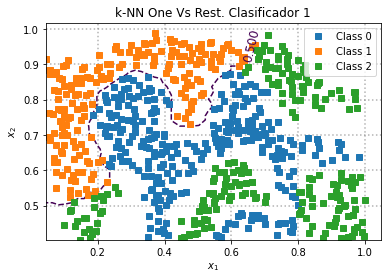

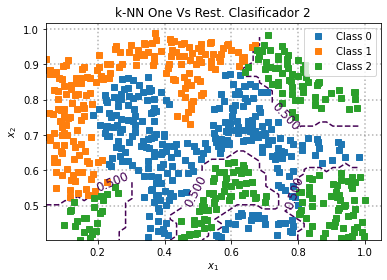

In [ ]:
#Obtenemos una rejilla de puntos en los que evaluaremos nuestro RL (espacio original de los datos!)
x1,x2 = np.mgrid[min1:max1:(max1-min1)/50, min2:max2:(max2-min2)/50]
grid = np.transpose(np.row_stack([x1.ravel(), x2.ravel()]))

# Normalizamos la rejilla
grid_norm = transformer3.transform(grid)

for i,c in enumerate(mi_knn3_OneVsRest.estimators_):
    
    #Estimamos la probabilidad asociada a cada punto con el método .predic_proba
    probs_KNN3=c.predict_proba(grid_norm)
    
    label = r'k-NN One Vs Rest. Clasificador ' + str(i)

    # Representaciones usando la función muestra_frontera
    muestra_frontera(x1_grid=x1,x2_grid=x2,probs_grid=probs_KNN3,
                     X_train=X03_train,Y_train=Y3_train,frontera=True,
                     titulo=label)


A la vista de los diagramas, podemos comprobar que
- El primer clasificador separa la clase 0 del resto
- El segundo clasificador separa la clase 1 del resto
- El tercer clasificador separa la clase 2 del resto

Finalmente, para comprobar cómo de bien funciona el k-NN multi-clase que hemos implementado, vamos a obtener la matriz de confusión:

In [20]:
plot_confusion_matrix(mi_knn3_OneVsRest, X3_test, Y3_test)

NameError: ignored

 > **Ejercicio**: Utilizando RL, expansión polinómica hasta grado 5 y regularización L2, muestre las regiones de decisión de los tres clasificadores entrenados en un esquema OneVsRest.

In [21]:
# Primero incluimos las variables polinómicas

poly_grado5= PolynomialFeatures(5,include_bias=False) #No usamos x^0 = 1

X03_train_grado5 = poly_grado5.fit_transform(X03_train)#<SOL>

X03_test_grado5 = poly_grado5.transform(X03_test)#<SOL>

# Normalización

transformer3_grado5 = StandardScaler().fit(X03_train_grado5)

X3_train_grado5 = transformer3_grado5.fit_transform(X03_train_grado5) #<SOL>
X3_test_grado5 =  transformer3_grado5.transform(X03_test_grado5)#<SOL>


In [22]:
from sklearn.multiclass import OneVsRestClassifier
# Entrenamiento RL con validación parámetro de regularización L2
rango_C = np.logspace(-2, 1, 20)  # Rango C en escala logarítmica (base 10). Esto es, 20 puntos desde 10^-2, a 10^1.
diccionario_parametros =  {'C' : rango_C} #<SOL>
nfold = 10 # Número de particiones train/validación

RL3 = GridSearchCV(estimator=LogisticRegression(penalty='l2'),
                                  param_grid=diccionario_parametros, cv=nfold)

RL3_OneVsRest =  OneVsRestClassifier(mi_knn3).fit(X3_train_grado5,Y3_train)#<SOL>

In [25]:
# Y el número de vecinos validado para cada uno de ellos
for i,clasificador in enumerate(RL3_OneVsRest.estimators_):
  print("El parámetro C para el clasificador {0:d} es {1:f}".format(i,clasificador.best_params_['C']))

KeyError: ignored

<ipython-input-5-5885b8d7e668>:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


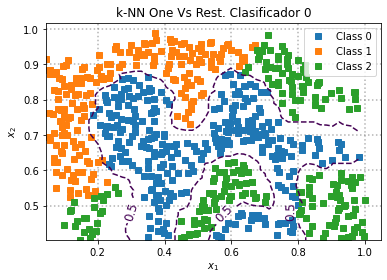

<ipython-input-5-5885b8d7e668>:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


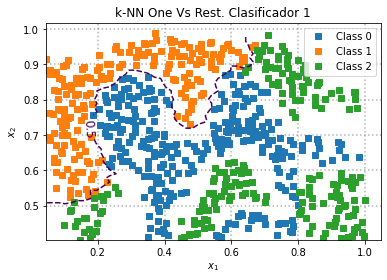

<ipython-input-5-5885b8d7e668>:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)


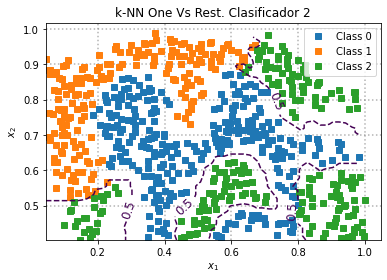

In [26]:
# Obtenemos una rejilla de puntos en los que evaluaremos nuestro RL (espacio original de los datos!)
x1,x2 = np.mgrid[min1:max1:(max1-min1)/50, min2:max2:(max2-min2)/50]
grid = np.transpose(np.row_stack([x1.ravel(), x2.ravel()]))

# Obtenemos una rejilla de puntos en los que evaluaremos nuestro RL (espacio original de los datos!)
grid_ext = poly_grado5.transform(grid)

# Normalizamos la rejilla
grid_norm = transformer3_grado5.transform(grid_ext) #<SOL> 

for i,c in enumerate(RL3_OneVsRest.estimators_):
    
    # Estimamos la probabilidad asociada a cada punto con el método .predic_proba
    probs_RL3=c.predict_proba(grid_norm) #<SOL>
    
    label = r'k-NN One Vs Rest. Clasificador ' + str(i)

    # Representaciones usando la función muestra_frontera
    muestra_frontera(x1_grid=x1,x2_grid=x2,probs_grid=probs_RL3,
                     X_train=X03_train,Y_train=Y3_train,frontera=True,
                     titulo=label)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


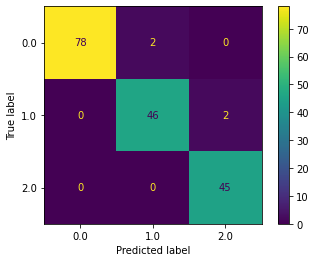

In [ ]:
# Finalmente mostramos matriz de confusión

plot_confusion_matrix(RL3_OneVsRest, X3_test_grado5, Y3_test)